# Explore JEDI v2 spot checks

Objective: Look at some dimming data for 
1. cases that have been studied by hand in earlier papers
2. histograms of all parameters 
3. randomly selected events 

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly 
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.io as pio
import cufflinks as cf

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
%matplotlib inline
sns.set()
plotly.tools.set_credentials_file(username='jmason86', api_key='wvT5wAI0l7q3uCvxT8ny')

In [4]:
filename = '/Users/jmason86/Dropbox/Research/Postdoc_NASA/Analysis/Coronal Dimming Analysis/JEDI Catalog/jedi_v2.h5'
jedi = pd.read_hdf(filename, key='jedi')
jedi.index = pd.DatetimeIndex(jedi['GOES Flare Peak Time'])

In [5]:
nan = jedi.isnull().sum().sum()
all = float(len(jedi)) * float(len(jedi.columns))
'{}% of JEDI is NaN'.format(round(nan/all*100))

'90.0% of JEDI is NaN'

In [6]:
df_depth = jedi.filter(like='Depth Max [%]')
df_slope = jedi.filter(like='Slope Mean [%/s]')
df_duration = jedi.filter(like='Duration [s]')

all = len(df_depth) * len(df_depth.columns)

nan_depth = df_depth.isnull().sum().sum()
nan_slope = df_slope.isnull().sum().sum()
nan_duration = df_duration.isnull().sum().sum()

print('There are {} non-NaN max depths'.format(all - nan_depth))
print('There are {} non-NaN mean slopes'.format(all - nan_slope))
print('There are {} non-NaN durations'.format(all - nan_duration))

There are 16642 non-NaN max depths
There are 16577 non-NaN mean slopes
There are 12333 non-NaN durations


In [8]:
jedi.head()

,Event #,GOES Flare Start Time,GOES Flare Peak Time,GOES Flare Class,Pre-Flare Start Time,Pre-Flare End Time,Flare Interrupt,Flare Latitude [deg],Flare Longitude [deg],Flare Position Angle [deg],9.4 Pre-Flare Irradiance [W/m2],13.1 Pre-Flare Irradiance [W/m2],13.3 Pre-Flare Irradiance [W/m2],17.1 Pre-Flare Irradiance [W/m2],17.7 Pre-Flare Irradiance [W/m2],18.0 Pre-Flare Irradiance [W/m2],19.5 Pre-Flare Irradiance [W/m2],20.2 Pre-Flare Irradiance [W/m2],21.1 Pre-Flare Irradiance [W/m2],25.6 Pre-Flare Irradiance [W/m2],28.4 Pre-Flare Irradiance [W/m2],30.4 Pre-Flare Irradiance [W/m2],33.5 Pre-Flare Irradiance [W/m2],36.1 Pre-Flare Irradiance [W/m2],36.8 Pre-Flare Irradiance [W/m2],44.6 Pre-Flare Irradiance [W/m2],46.5 Pre-Flare Irradiance [W/m2],49.9 Pre-Flare Irradiance [W/m2],52.1 Pre-Flare Irradiance [W/m2],52.6 Pre-Flare Irradiance [W/m2],53.7 Pre-Flare Irradiance [W/m2],55.4 Pre-Flare Irradiance [W/m2],56.8 Pre-Flare Irradiance [W/m2],58.4 Pre-Flare Irradiance [W/m2],59.2 Pre-Flare Irradiance [W/m2],60.0 Pre-Flare Irradiance [W/m2],61.0 Pre-Flare Irradiance [W/m2],62.5 Pre-Flare Irradiance [W/m2],63.0 Pre-Flare Irradiance [W/m2],71.9 Pre-Flare Irradiance [W/m2],72.2 Pre-Flare Irradiance [W/m2],77.0 Pre-Flare Irradiance [W/m2],79.0 Pre-Flare Irradiance [W/m2],83.6 Pre-Flare Irradiance [W/m2],95.0 Pre-Flare Irradiance [W/m2],97.3 Pre-Flare Irradiance [W/m2],97.7 Pre-Flare Irradiance [W/m2],102.6 Pre-Flare Irradiance [W/m2],103.2 Pre-Flare Irradiance [W/m2],9.4 Slope Start Time,13.1 Slope Start Time,13.3 Slope Start Time,17.1 Slope Start Time,17.7 Slope Start Time,18.0 Slope Start Time,19.5 Slope Start Time,20.2 Slope Start Time,21.1 Slope Start Time,25.6 Slope Start Time,28.4 Slope Start Time,30.4 Slope Start Time,33.5 Slope Start Time,36.1 Slope Start Time,36.8 Slope Start Time,44.6 Slope Start Time,46.5 Slope Start Time,49.9 Slope Start Time,52.1 Slope Start Time,52.6 Slope Start Time,53.7 Slope Start Time,55.4 Slope Start Time,56.8 Slope Start Time,58.4 Slope Start Time,59.2 Slope Start Time,60.0 Slope Start Time,61.0 Slope Start Time,62.5 Slope Start Time,63.0 Slope Start Time,71.9 Slope Start Time,72.2 Slope Start Time,77.0 Slope Start Time,79.0 Slope Start Time,83.6 Slope Start Time,95.0 Slope Start Time,97.3 Slope Start Time,97.7 Slope Start Time,102.6 Slope Start Time,103.2 Slope Start Time,9.4 Slope End Time,13.1 Slope End Time,13.3 Slope End Time,17.1 Slope End Time,17.7 Slope End Time,18.0 Slope End Time,19.5 Slope End Time,20.2 Slope End Time,21.1 Slope End Time,25.6 Slope End Time,28.4 Slope End Time,30.4 Slope End Time,33.5 Slope End Time,36.1 Slope End Time,36.8 Slope End Time,44.6 Slope End Time,46.5 Slope End Time,49.9 Slope End Time,52.1 Slope End Time,52.6 Slope End Time,53.7 Slope End Time,55.4 Slope End Time,56.8 Slope End Time,58.4 Slope End Time,59.2 Slope End Time,60.0 Slope End Time,61.0 Slope End Time,62.5 Slope End Time,63.0 Slope End Time,71.9 Slope End Time,72.2 Slope End Time,77.0 Slope End Time,79.0 Slope End Time,83.6 Slope End Time,95.0 Slope End Time,97.3 Slope End Time,97.7 Slope End Time,102.6 Slope End Time,103.2 Slope End Time,9.4 Slope Min [%/s],13.1 Slope Min [%/s],13.3 Slope Min [%/s],17.1 Slope Min [%/s],17.7 Slope Min [%/s],18.0 Slope Min [%/s],19.5 Slope Min [%/s],20.2 Slope Min [%/s],21.1 Slope Min [%/s],25.6 Slope Min [%/s],28.4 Slope Min [%/s],30.4 Slope Min [%/s],33.5 Slope Min [%/s],36.1 Slope Min [%/s],36.8 Slope Min [%/s],44.6 Slope Min [%/s],46.5 Slope Min [%/s],49.9 Slope Min [%/s],52.1 Slope Min [%/s],52.6 Slope Min [%/s],53.7 Slope Min [%/s],55.4 Slope Min [%/s],56.8 Slope Min [%/s],58.4 Slope Min [%/s],59.2 Slope Min [%/s],60.0 Slope Min [%/s],61.0 Slope Min [%/s],62.5 Slope Min [%/s],63.0 Slope Min [%/s],71.9 Slope Min [%/s],72.2 Slope Min [%/s],77.0 Slope Min [%/s],79.0 Slope Min [%/s],83.6 Slope Min [%/s],95.0 Slope Min [%/s],97.3 Slope Min [%/s],97.7 Slope Min [%/s],102.6 Slope Min [%/s],103.2 Slope Min [%/s],9.4 Slope Max [%/s],13.1 Slope Max [%/s],13.3 Slope Max [

## 2010 August 7 event (from 2014 paper)

### 2010-08-07 depth

In [9]:
case1 = jedi['2010-08-07']

In [10]:
#case1.filter(regex="17.1 * Depth Max")
case1['17.1 Depth Max [%]']

GOES Flare Peak Time
2010-08-07 18:24:00   NaN
Name: 17.1 Depth Max [%], dtype: float64

Well that sucks. I hoped that it would automatically find a value here that I could compare with the 1.63% from the paper. 
What about the rest of the uncorrected lines? Can't slice with column names. Need to get the column index and slice out through the 39 emission lines.

In [11]:
jedi.columns.get_loc('9.4 Depth Max [%]')

400

In [12]:
case1[case1.columns[400:400+39]]

,9.4 Depth Max [%],13.1 Depth Max [%],13.3 Depth Max [%],17.1 Depth Max [%],17.7 Depth Max [%],18.0 Depth Max [%],19.5 Depth Max [%],20.2 Depth Max [%],21.1 Depth Max [%],25.6 Depth Max [%],28.4 Depth Max [%],30.4 Depth Max [%],33.5 Depth Max [%],36.1 Depth Max [%],36.8 Depth Max [%],44.6 Depth Max [%],46.5 Depth Max [%],49.9 Depth Max [%],52.1 Depth Max [%],52.6 Depth Max [%],53.7 Depth Max [%],55.4 Depth Max [%],56.8 Depth Max [%],58.4 Depth Max [%],59.2 Depth Max [%],60.0 Depth Max [%],61.0 Depth Max [%],62.5 Depth Max [%],63.0 Depth Max [%],71.9 Depth Max [%],72.2 Depth Max [%],77.0 Depth Max [%],79.0 Depth Max [%],83.6 Depth Max [%],95.0 Depth Max [%],97.3 Depth Max [%],97.7 Depth Max [%],102.6 Depth Max [%],103.2 Depth Max [%]
GOES Flare Peak Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-08-07 18:24:00,4.509083,7.974006,NaN,NaN,NaN,NaN,2.593467,NaN,NaN,0.498995,NaN,1.110902,15.081736,NaN,6.542261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


All the "dimming lines" from the paper are NaN here :( except the 19.5 depth showed up. It's 2.59% compared to the 1.52% found in the paper. And the first depth found (see below) is also 2.58%, so basically no different. Hmpf. 

In [13]:
jedi.columns.get_loc('9.4 Depth First [%]')

322

In [14]:
case1[case1.columns[322:322+39]]

,9.4 Depth First [%],13.1 Depth First [%],13.3 Depth First [%],17.1 Depth First [%],17.7 Depth First [%],18.0 Depth First [%],19.5 Depth First [%],20.2 Depth First [%],21.1 Depth First [%],25.6 Depth First [%],28.4 Depth First [%],30.4 Depth First [%],33.5 Depth First [%],36.1 Depth First [%],36.8 Depth First [%],44.6 Depth First [%],46.5 Depth First [%],49.9 Depth First [%],52.1 Depth First [%],52.6 Depth First [%],53.7 Depth First [%],55.4 Depth First [%],56.8 Depth First [%],58.4 Depth First [%],59.2 Depth First [%],60.0 Depth First [%],61.0 Depth First [%],62.5 Depth First [%],63.0 Depth First [%],71.9 Depth First [%],72.2 Depth First [%],77.0 Depth First [%],79.0 Depth First [%],83.6 Depth First [%],95.0 Depth First [%],97.3 Depth First [%],97.7 Depth First [%],102.6 Depth First [%],103.2 Depth First [%]
GOES Flare Peak Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-08-07 18:24:00,1.995414,5.648798,NaN,NaN,NaN,NaN,2.577505,NaN,NaN,0.260418,NaN,0.060381,0.939944,NaN,3.323307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


What about the corrected values? The paper looked at corrections by 28.4. 

In [15]:
case1.filter(regex="\d\d\.\d by 28.4 Depth Max \[\%\]")

,13.1 by 28.4 Depth Max [%],13.3 by 28.4 Depth Max [%],17.1 by 28.4 Depth Max [%],17.7 by 28.4 Depth Max [%],18.0 by 28.4 Depth Max [%],19.5 by 28.4 Depth Max [%],20.2 by 28.4 Depth Max [%],21.1 by 28.4 Depth Max [%],25.6 by 28.4 Depth Max [%],30.4 by 28.4 Depth Max [%],33.5 by 28.4 Depth Max [%],36.1 by 28.4 Depth Max [%],36.8 by 28.4 Depth Max [%],44.6 by 28.4 Depth Max [%],46.5 by 28.4 Depth Max [%],49.9 by 28.4 Depth Max [%],52.1 by 28.4 Depth Max [%],52.6 by 28.4 Depth Max [%],53.7 by 28.4 Depth Max [%],55.4 by 28.4 Depth Max [%],56.8 by 28.4 Depth Max [%],58.4 by 28.4 Depth Max [%],59.2 by 28.4 Depth Max [%],60.0 by 28.4 Depth Max [%],61.0 by 28.4 Depth Max [%],62.5 by 28.4 Depth Max [%],63.0 by 28.4 Depth Max [%],71.9 by 28.4 Depth Max [%],72.2 by 28.4 Depth Max [%],77.0 by 28.4 Depth Max [%],79.0 by 28.4 Depth Max [%],83.6 by 28.4 Depth Max [%],95.0 by 28.4 Depth Max [%],97.3 by 28.4 Depth Max [%],97.7 by 28.4 Depth Max [%],102.6 by 28.4 Depth Max [%],103.2 by 28.4 Depth Max [%]
GOES Flare Peak Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-08-07 18:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
case1.filter(regex="\d\d\.\d by 28.4 Depth First \[\%\]")

,13.1 by 28.4 Depth First [%],13.3 by 28.4 Depth First [%],17.1 by 28.4 Depth First [%],17.7 by 28.4 Depth First [%],18.0 by 28.4 Depth First [%],19.5 by 28.4 Depth First [%],20.2 by 28.4 Depth First [%],21.1 by 28.4 Depth First [%],25.6 by 28.4 Depth First [%],30.4 by 28.4 Depth First [%],33.5 by 28.4 Depth First [%],36.1 by 28.4 Depth First [%],36.8 by 28.4 Depth First [%],44.6 by 28.4 Depth First [%],46.5 by 28.4 Depth First [%],49.9 by 28.4 Depth First [%],52.1 by 28.4 Depth First [%],52.6 by 28.4 Depth First [%],53.7 by 28.4 Depth First [%],55.4 by 28.4 Depth First [%],56.8 by 28.4 Depth First [%],58.4 by 28.4 Depth First [%],59.2 by 28.4 Depth First [%],60.0 by 28.4 Depth First [%],61.0 by 28.4 Depth First [%],62.5 by 28.4 Depth First [%],63.0 by 28.4 Depth First [%],71.9 by 28.4 Depth First [%],72.2 by 28.4 Depth First [%],77.0 by 28.4 Depth First [%],79.0 by 28.4 Depth First [%],83.6 by 28.4 Depth First [%],95.0 by 28.4 Depth First [%],97.3 by 28.4 Depth First [%],97.7 by 28.4 Depth First [%],102.6 by 28.4 Depth First [%],103.2 by 28.4 Depth First [%]
GOES Flare Peak Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-08-07 18:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Well that sucks too. All NaN. I'd expect most of to be NaN since the initial depths were mostly NaN, but there was some hope that the 28.4 line was not NaN at the depth time once it was shifted in time for peak matching. Actually no... the light curves at the depth determination step have already been fitted, so are smooth curves without NaNs unless the whole thing is no good.

### 2010-08-07 event slope

In [17]:
case1['17.1 Slope Mean [%/s]']

GOES Flare Peak Time
2010-08-07 18:24:00   NaN
Name: 17.1 Slope Mean [%/s], dtype: float64

In [18]:
case1.filter(regex="\d\d\.\d Slope Mean \[\%/s\]")

,13.1 Slope Mean [%/s],13.3 Slope Mean [%/s],17.1 Slope Mean [%/s],17.7 Slope Mean [%/s],18.0 Slope Mean [%/s],19.5 Slope Mean [%/s],20.2 Slope Mean [%/s],21.1 Slope Mean [%/s],25.6 Slope Mean [%/s],28.4 Slope Mean [%/s],30.4 Slope Mean [%/s],33.5 Slope Mean [%/s],36.1 Slope Mean [%/s],36.8 Slope Mean [%/s],44.6 Slope Mean [%/s],46.5 Slope Mean [%/s],49.9 Slope Mean [%/s],52.1 Slope Mean [%/s],52.6 Slope Mean [%/s],53.7 Slope Mean [%/s],55.4 Slope Mean [%/s],56.8 Slope Mean [%/s],58.4 Slope Mean [%/s],59.2 Slope Mean [%/s],60.0 Slope Mean [%/s],61.0 Slope Mean [%/s],62.5 Slope Mean [%/s],63.0 Slope Mean [%/s],71.9 Slope Mean [%/s],72.2 Slope Mean [%/s],77.0 Slope Mean [%/s],79.0 Slope Mean [%/s],83.6 Slope Mean [%/s],95.0 Slope Mean [%/s],97.3 Slope Mean [%/s],97.7 Slope Mean [%/s],102.6 Slope Mean [%/s],103.2 Slope Mean [%/s],9.4 by 13.1 Slope Mean [%/s],9.4 by 13.3 Slope Mean [%/s],9.4 by 17.1 Slope Mean [%/s],9.4 by 17.7 Slope Mean [%/s],9.4 by 18.0 Slope Mean [%/s],9.4 by 19.5 Slope Mean [%/s],9.4 by 20.2 Slope Mean [%/s],9.4 by 21.1 Slope Mean [%/s],9.4 by 25.6 Slope Mean [%/s],9.4 by 28.4 Slope Mean [%/s],9.4 by 30.4 Slope Mean [%/s],9.4 by 33.5 Slope Mean [%/s],9.4 by 36.1 Slope Mean [%/s],9.4 by 36.8 Slope Mean [%/s],9.4 by 44.6 Slope Mean [%/s],9.4 by 46.5 Slope Mean [%/s],9.4 by 49.9 Slope Mean [%/s],9.4 by 52.1 Slope Mean [%/s],9.4 by 52.6 Slope Mean [%/s],9.4 by 53.7 Slope Mean [%/s],9.4 by 55.4 Slope Mean [%/s],9.4 by 56.8 Slope Mean [%/s],9.4 by 58.4 Slope Mean [%/s],9.4 by 59.2 Slope Mean [%/s],9.4 by 60.0 Slope Mean [%/s],9.4 by 61.0 Slope Mean [%/s],9.4 by 62.5 Slope Mean [%/s],9.4 by 63.0 Slope Mean [%/s],9.4 by 71.9 Slope Mean [%/s],9.4 by 72.2 Slope Mean [%/s],9.4 by 77.0 Slope Mean [%/s],9.4 by 79.0 Slope Mean [%/s],9.4 by 83.6 Slope Mean [%/s],9.4 by 95.0 Slope Mean [%/s],9.4 by 97.3 Slope Mean [%/s],9.4 by 97.7 Slope Mean [%/s],9.4 by 102.6 Slope Mean [%/s],9.4 by 103.2 Slope Mean [%/s],13.1 by 13.3 Slope Mean [%/s],13.1 by 17.1 Slope Mean [%/s],13.1 by 17.7 Slope Mean [%/s],13.1 by 18.0 Slope Mean [%/s],13.1 by 19.5 Slope Mean [%/s],13.1 by 20.2 Slope Mean [%/s],13.1 by 21.1 Slope Mean [%/s],13.1 by 25.6 Slope Mean [%/s],13.1 by 28.4 Slope Mean [%/s],13.1 by 30.4 Slope Mean [%/s],13.1 by 33.5 Slope Mean [%/s],13.1 by 36.1 Slope Mean [%/s],13.1 by 36.8 Slope Mean [%/s],13.1 by 44.6 Slope Mean [%/s],13.1 by 46.5 Slope Mean [%/s],13.1 by 49.9 Slope Mean [%/s],13.1 by 52.1 Slope Mean [%/s],13.1 by 52.6 Slope Mean [%/s],13.1 by 53.7 Slope Mean [%/s],13.1 by 55.4 Slope Mean [%/s],13.1 by 56.8 Slope Mean [%/s],13.1 by 58.4 Slope Mean [%/s],13.1 by 59.2 Slope Mean [%/s],13.1 by 60.0 Slope Mean [%/s],13.1 by 61.0 Slope Mean [%/s],13.1 by 62.5 Slope Mean [%/s],13.1 by 63.0 Slope Mean [%/s],13.1 by 71.9 Slope Mean [%/s],13.1 by 72.2 Slope Mean [%/s],13.1 by 77.0 Slope Mean [%/s],13.1 by 79.0 Slope Mean [%/s],13.1 by 83.6 Slope Mean [%/s],13.1 by 95.0 Slope Mean [%/s],13.1 by 97.3 Slope Mean [%/s],13.1 by 97.7 Slope Mean [%/s],13.1 by 102.6 Slope Mean [%/s],13.1 by 103.2 Slope Mean [%/s],13.3 by 13.1 Slope Mean [%/s],13.3 by 17.1 Slope Mean [%/s],13.3 by 17.7 Slope Mean [%/s],13.3 by 18.0 Slope Mean [%/s],13.3 by 19.5 Slope Mean [%/s],13.3 by 20.2 Slope Mean [%/s],13.3 by 21.1 Slope Mean [%/s],13.3 by 25.6 Slope Mean [%/s],13.3 by 28.4 Slope Mean [%/s],13.3 by 30.4 Slope Mean [%/s],13.3 by 33.5 Slope Mean [%/s],13.3 by 36.1 Slope Mean [%/s],13.3 by 36.8 Slope Mean [%/s],13.3 by 44.6 Slope Mean [%/s],13.3 by 46.5 Slope Mean [%/s],13.3 by 49.9 Slope Mean [%/s],13.3 by 52.1 Slope Mean [%/s],13.3 by 52.6 Slope Mean [%/s],13.3 by 53.7 Slope Mean [%/s],13.3 by 55.4 Slope Mean [%/s],13.3 by 56.8 Slope Mean [%/s],13.3 by 58.4 Slope Mean [%/s],13.3 by 59.2 Slope Mean [%/s],13.3 by 60.0 Slope Mean [%/s],13.3 by 61.0 Slope Mean [%/s],13.3 by 62.5 Slope Mean [%/s],13.3 by 63.0 Slope Mean [%/s],13.3 by 71.9 Slope Mean [%/s],13.3 by 72.2 Slope Mean [%/s],13.3 by 77.0 Slope Mean [%/s],13.3 by 79.0 Slope Mean [%/s],13.3 by 83.6 Sl

Pretty sparse. Comparing to the paper: 

Paper 19.5: 0.81 %/hr

JEDI  19.5: 2.75 %/hr

That's more than 3x different.

## 2016 paper of 2-2 week events

In [19]:
week1 = jedi['2011-02-10':'2011-02-25']
week2 = jedi['2011-08-01':'2011-08-14']
twotwo = pd.concat([week1, week2])

In [20]:
twotwo['17.1 Depth Max [%]'].dropna()

GOES Flare Peak Time
2011-02-17 21:35:00    1.094239
2011-02-18 21:04:00    5.811854
2011-02-19 03:03:00    6.317465
2011-02-19 08:04:00    3.493335
2011-02-19 16:43:00    3.992146
2011-02-19 21:13:00    3.587659
2011-02-24 19:38:00    2.034138
2011-02-25 05:44:00    1.552227
2011-08-01 22:13:00    1.281566
2011-08-02 06:19:00    3.137163
2011-08-02 09:27:00    5.692631
Name: 17.1 Depth Max [%], dtype: float64

None of these are super close matches to what's in Table 1 of the paper. That paper though doesn't say which line or line combo I'm using for the depth column. 

In [21]:
twotwo[twotwo.columns[400:400+39]].dropna(how='all')

,9.4 Depth Max [%],13.1 Depth Max [%],13.3 Depth Max [%],17.1 Depth Max [%],17.7 Depth Max [%],18.0 Depth Max [%],19.5 Depth Max [%],20.2 Depth Max [%],21.1 Depth Max [%],25.6 Depth Max [%],28.4 Depth Max [%],30.4 Depth Max [%],33.5 Depth Max [%],36.1 Depth Max [%],36.8 Depth Max [%],44.6 Depth Max [%],46.5 Depth Max [%],49.9 Depth Max [%],52.1 Depth Max [%],52.6 Depth Max [%],53.7 Depth Max [%],55.4 Depth Max [%],56.8 Depth Max [%],58.4 Depth Max [%],59.2 Depth Max [%],60.0 Depth Max [%],61.0 Depth Max [%],62.5 Depth Max [%],63.0 Depth Max [%],71.9 Depth Max [%],72.2 Depth Max [%],77.0 Depth Max [%],79.0 Depth Max [%],83.6 Depth Max [%],95.0 Depth Max [%],97.3 Depth Max [%],97.7 Depth Max [%],102.6 Depth Max [%],103.2 Depth Max [%]
GOES Flare Peak Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-02-10 06:58:00,0.647494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-10 13:52:00,2.558323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.532367,NaN,NaN,1.337864,NaN,NaN,NaN,NaN,NaN,2.720638,2.004317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.217665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-12 15:06:00,NaN,1.110281,NaN,NaN,NaN,NaN,NaN,NaN,2.409281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.732570,3.186935,NaN,NaN,NaN,NaN,2.708936,NaN,NaN,NaN,2.175332,2.375516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.505186,NaN
2011-02-13 07:29:00,NaN,NaN,NaN,NaN,0.216895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-13 17:38:00,NaN,NaN,NaN,NaN,3.655487,NaN,NaN,NaN,NaN,1.007116,NaN,NaN,NaN,NaN,NaN,NaN,1.841208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-14 04:49:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.568939,NaN,NaN,NaN,NaN,1.925506,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-14 08:49:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.281858,NaN,NaN
2011-02-14 17:26:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.125172,NaN,2.859243
2011-02-14 19:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.766704,NaN,0.867094,NaN,NaN,NaN,0.977573,0.869677,NaN,NaN,NaN,NaN,0.403348,0.950826,1.124809,NaN,NaN,2.476924,NaN,2.557511


In [22]:
twotwo[twotwo.columns[400:400+39]].dropna(how='all').describe()

,9.4 Depth Max [%],13.1 Depth Max [%],13.3 Depth Max [%],17.1 Depth Max [%],17.7 Depth Max [%],18.0 Depth Max [%],19.5 Depth Max [%],20.2 Depth Max [%],21.1 Depth Max [%],25.6 Depth Max [%],28.4 Depth Max [%],30.4 Depth Max [%],33.5 Depth Max [%],36.1 Depth Max [%],36.8 Depth Max [%],44.6 Depth Max [%],46.5 Depth Max [%],49.9 Depth Max [%],52.1 Depth Max [%],52.6 Depth Max [%],53.7 Depth Max [%],55.4 Depth Max [%],56.8 Depth Max [%],58.4 Depth Max [%],59.2 Depth Max [%],60.0 Depth Max [%],61.0 Depth Max [%],62.5 Depth Max [%],63.0 Depth Max [%],71.9 Depth Max [%],72.2 Depth Max [%],77.0 Depth Max [%],79.0 Depth Max [%],83.6 Depth Max [%],95.0 Depth Max [%],97.3 Depth Max [%],97.7 Depth Max [%],102.6 Depth Max [%],103.2 Depth Max [%]
count,25.000000,13.000000,0.0,11.000000,13.000000,8.000000,16.000000,13.000000,12.000000,23.000000,14.000000,26.000000,9.000000,0.0,4.000000,0.0,8.000000,16.000000,13.000000,3.000000,7.000000,7.000000,0.0,11.000000,0.0,3.000000,8.000000,9.000000,8.000000,0.0,0.0,3.000000,2.000000,4.000000,0.0,0.0,10.000000,7.000000,6.000000
mean,2.475385,2.124201,NaN,3.454038,2.760286,3.996287,2.989289,2.753476,2.784384,1.104513,3.310185,0.826427,4.451403,NaN,2.347608,NaN,2.153897,2.570145,2.892161,0.916362,1.219496,0.792853,NaN,1.683839,NaN,1.286969,1.968655,2.087295,1.223767,NaN,NaN,1.206341,0.898425,1.414171,NaN,NaN,2.175537,1.205301,2.683871
std,2.852223,1.548702,NaN,1.873512,1.810037,1.884474,2.421691,1.946540,2.431515,0.610970,3.539414,0.541493,4.070483,NaN,1.235626,NaN,1.307512,2.464824,2.673254,0.167351,0.842767,0.553410,NaN,1.173726,NaN,0.336334,2.154422,1.012432,0.556376,NaN,NaN,0.764534,0.074106,1.142957,NaN,NaN,0.796599,0.940244,1.118911
min,0.090353,0.584176,NaN,1.094239,0.180734,0.906907,0.554855,0.454878,0.805661,0.067856,0.424246,0.105607,0.967752,NaN,0.789122,NaN,0.518417,0.272048,0.155477,0.766704,0.283530,0.153749,NaN,0.356863,NaN,0.977573,0.185992,0.301382,0.668883,NaN,NaN,0.403348,0.846024,0.573053,NaN,NaN,0.974100,0.305758,0.821604
25%,1.204138,1.171057,NaN,1.793183,1.080057,2.305098,1.030777,1.201831,0.994837,0.784377,0.907439,0.429721,1.889475,NaN,1.822545,NaN,1.108306,1.149684,1.295572,0.826013,0.737008,0.427197,NaN,0.766817,NaN,1.107976,0.794492,2.175332,0.859760,NaN,NaN,0.846758,0.872224,0.791169,NaN,NaN,1.515163,0.440809,2.320972
50%,1.708052,1.532842,NaN,3.493335,3.655487,4.997044,1.983617,2.510870,1.851224,1.048475,2.463680,0.740900,2.147157,NaN,2.416713,NaN,2.112005,1.835691,2.337018,0.885321,0.913373,0.722628,NaN,1.447521,NaN,1.238379,1.013156,2.269190,1.058255,NaN,NaN,1.290169,0.898425,0.994342,NaN,NaN,2.313079,1.042084,2.708377
75%,2.836657,2.079631,NaN,4.842388,3.989260,5.249560,5.098008,4.523991,3.857773,1.440256,3.662359,1.154392,7.553798,NaN,2.941777,NaN,3.221029,2.860563,3.186935,0.991190,1.571734,1.050701,NaN,2.219989,NaN,1.441667,2.200606,2.627387,1.396965,NaN,NaN,1.607838,0.924626,1.617345,NaN,NaN,2.861530,1.851232,3.527720
max,14.703334,6.103199,NaN,6.317465,4.959227,5.938187,7.870971,5.593523,8.408902,2.628334,13.596979,2.565568,12.694341,NaN,3.767886,NaN,4.028235,9.811081,8.968976,1.097059,2.722088,1.717799,NaN,3.828507,NaN,1.644955,6.217665,3.230773,2.375516,NaN,NaN,1.925506,0.950826,3.094950,NaN,NaN,3.125172,2.505186,3.872194


Interesting that the 9.4 nm line shows regular dimming, though it's std is larger than the mean. Maybe I could apply a condition that the std be like half the mean or something to be considered valid. Some of the dimming lines would satisy such a condition. 

From the paper Table 1 depth column: 

$\mu$ = 2.06%

$\sigma$ = 1.35%

# Histograms

In [209]:
cf.set_config_file(offline=False, world_readable=True, theme='ggplot') # theme options: ggplot, solar, white, space

In [300]:
def get_line_list(wavelength_sorted=False, megs_a_only=False):
    temperature_sorted_lines = ['53.7', '95.0', '97.3', '102.6', '58.4', '71.9', '83.6', '30.4', '25.6', '97.7', '52.6', '60.0', '55.4', '79.0',
                                '63.0', '103.2', '13.1', '46.5', '17.1', '77.0', '17.7', '36.8', '62.5', '18.0', '61.0', '19.5', '20.2', '21.1',
                                '52.1', '49.9', '28.4', '33.5', '36.1', '44.6', '9.4', '59.2', '56.8', '72.2', '13.3']
    if megs_a_only:
        temperature_sorted_lines = ['30.4', '25.6', '13.1', '17.1', '17.7', '18.0', '19.5', '20.2', '21.1', '28.4', '33.5', '9.4', '13.3']
    
    if wavelength_sorted:
        temperature_sorted_lines.sort(key=float)
    
    return temperature_sorted_lines

In [301]:
def get_line_depth_col_names(wavelength_sorted=False, megs_a_only=False):
    return [s + ' Depth Max [%]' for s in get_line_list(wavelength_sorted=wavelength_sorted, megs_a_only=megs_a_only)]

In [302]:
def get_log_temperatures(asfloat=False, megs_a_only=False):
    logT = ['3.84', '3.84', '3.84', '3.84', '4.16', '4.48', '4.52', '4.70', '4.75', '4.84', '4.92', '4.92', '5.19', '5.19', '5.37',
            '5.47', '5.57', '5.71', '5.81', '5.81', '5.99', '5.99', '6.05', '6.07', '6.1', '6.13', '6.19', '6.27', '6.28', '6.29',
            '6.30', '6.43', '6.43', '6.44', '6.81', '6.89', '6.96', '6.96', '6.97']
    if megs_a_only:
        log_temperatures = ['4.70', '4.75', '5.57', '5.81', '5.99', '6.07', '6.13', '6.19', '6.27', '6.30', '6.43', '6.81', '6.97']
    
    if asfloat:
        logT = [float(t) for t in log_temperatures]
    return logT

In [303]:
def get_plot_titles(megs_a_only=False):
    plot_titles = [s + ' (' for s in get_log_temperatures(megs_a_only=megs_a_only)]
    plot_titles = [m + str(n) for m,n in zip(plot_titles, get_line_list())]
    plot_titles = [s + ' nm)' for s in plot_titles]
    return plot_titles

In [299]:
plot_titles = get_plot_titles()
df = jedi[get_line_depth_col_names()]

In [176]:
rows = 13
cols = 3
figure = df.iplot(kind='histogram', subplots=True, shape=(rows, cols), subplot_titles=plot_titles, legend=False, margin=(50, 10, 50, 70), 
                  xTitle='Max Depth [%]', bargap=0, shared_xaxes=True, shared_yaxes=True, bins=(0, 10, 0.25), asFigure=True)
figure['layout']['yaxis'].update({'range': [0, 100]})
figure['layout']['xaxis'].update({'range': [0, 10]})
for i in range(1, rows+1):
    figure['layout']['yaxis' + str(i)].update({'range': [0, 100]})
for i in range(1, cols+1):
    figure['layout']['xaxis' + str(i)].update({'range': [0, 10]})
for i, trace in enumerate(figure['data']):
    trace['marker']['line'] = dict(color='#4C72B0')
    trace['marker']['color'] = '#4C72B0'
py.iplot(figure, filename='JEDI max depth histograms')
#pio.write_image(figure, 'depth_histogram.pdf', width=600, height=1600, scale=2)

In [27]:
jedi['30.4 Depth Max [%]'].iplot(kind='histogram', bins=(0, 10, 0.25))

Sorted those histograms by temperature so it's easier to see if the number of dimmings going down. Also to see the depth of dimming going down. Are those trends there?

In [28]:
peak_totals = [19, np.nan, np.nan, np.nan, 46, np.nan, np.nan, 222, 100, 21, np.nan, 11, 46, np.nan, 36, np.nan, 68, 20, 44, np.nan, 61, np.nan, 15, 60, 17, 61, 69, 88, 22, 35, 49, 36, np.nan, np.nan, 114, np.nan, np.nan, np.nan, np.nan]
temperatures = [float(t) for t in log_temperatures]

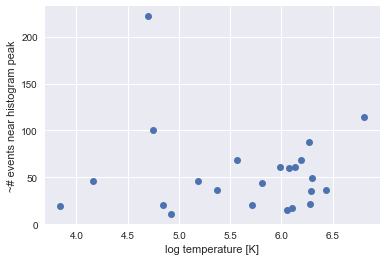

In [29]:
plt.plot(temperatures, peak_totals, 'o')
plt.xlabel('log temperature [K]')
plt.ylabel('~# events near histogram peak');

So maybe the first trend is there but it's not especially prominent. 

In [30]:
peak_depths = [0.88, np.nan, np.nan, np.nan, 0.88, np.nan, np.nan, 0.38, 0.63, 0.88, np.nan, 1.38, 0.63, np.nan, 1.13, np.nan, 1.88, 1.13, 1.38, np.nan, 0.63, np.nan, 0.88, 0.63, 0.88, 0.88, 1.13, 1.13, 1.13, 1.13, 1.13, 1.63, np.nan, np.nan, 0.88, np.nan, np.nan, np.nan, np.nan]

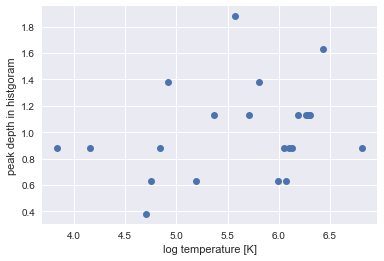

In [31]:
plt.plot(temperatures, peak_depths, 'o')
plt.xlabel('log temperature [K]')
plt.ylabel('peak depth in histgoram');

So the second trend doesn't really show up either, namely I don't see the largest peak depths in the 5.8-6.27 logT range. I'd expect that plot to look sort of like an inverted U, skewed to the right a little bit. Instead it basically looks like random scatter. 

### What about the two trends if I look only at MEGS-A. Much of the problem could be massive differences in the data cadence of MEGS-A vs -B. That means throwing out lines > 35 nm. About 2/3 the lines come from -B, but the cadence of -B is a super tiny fraction of -A, so the histograms could be very misleading. I could also consider normalizing by the observation percentage. 

In [304]:
plot_titles = get_plot_titles(megs_a_only=True)
df = jedi[get_line_depth_col_names(megs_a_only=True)]

In [195]:
rows = 4
cols = 4
figure = df.iplot(kind='histogram', subplots=True, shape=(rows, cols), subplot_titles=plot_titles, legend=False, margin=(50, 10, 50, 70), 
                  xTitle='Max Depth [%]', bargap=0, shared_xaxes=True, shared_yaxes=True, bins=(0, 10, 0.25), asFigure=True)
figure['layout']['yaxis'].update({'range': [0, 100]})
figure['layout']['xaxis'].update({'range': [0, 10]})
for i in range(1, rows+1):
    figure['layout']['yaxis' + str(i)].update({'range': [0, 100]})
for i in range(1, cols+1):
    figure['layout']['xaxis' + str(i)].update({'range': [0, 10]})
for i, trace in enumerate(figure['data']):
    trace['marker']['line'] = dict(color='#4C72B0')
    trace['marker']['color'] = '#4C72B0'
py.iplot(figure, filename='JEDI max depth histograms MEGS-A only')
#pio.write_image(figure, 'depth_histogram.pdf', width=600, height=1600, scale=2)

/Users/jmason86/anaconda/envs/jedi/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [196]:
bins = np.arange(0, 10, 0.25)
num_peak_max_depths = []
bin_peak_max_depths = []
peak_depths = []
for column in df:
    histogram = pd.cut(df[column], bins).value_counts().sort_index()
    num_peak_max_depths.append(max(histogram))
    bin_peak_max_depths.append(histogram.idxmax())
    peak_depths.append(histogram.idxmax().mid)

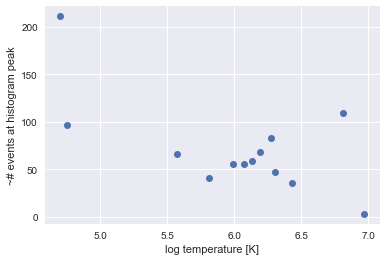

In [197]:
plt.plot(temperatures, num_peak_max_depths, 'o')
plt.xlabel('log temperature [K]')
plt.ylabel('~# events at histogram peak');

So even with just MEGS-A, there's still a lot of scatter. So trend 1... not clear. 

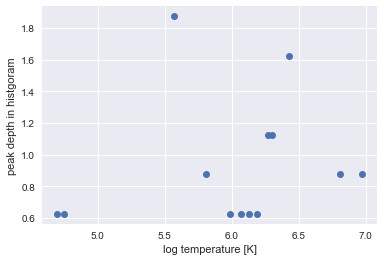

In [198]:
plt.plot(temperatures, peak_depths, 'o')
plt.xlabel('log temperature [K]')
plt.ylabel('peak depth in histgoram');

And also even with just MEGS-A, there's a lot of scatter for trend 2. 

## Normalizing histograms by instrument duty cycle

In IDL with the bare bones saveset, I've computed that the duty cycles are 96.3% and 16.8% for MEGS-A and -B, respectively. So to normalize, I just divide my histogram counts by that. Simple to state, but will take several lines of code to do.

In [305]:
plot_titles = get_plot_titles()
df = jedi[get_line_depth_col_names()]

In [306]:
bins = np.arange(0, 10, 0.25)
num_peak_max_depths = []
bin_peak_max_depths = []
peak_depths = []
df_normalized = pd.DataFrame()
for column in df:
    histogram = pd.cut(df[column], bins).value_counts().sort_index()
    wavelength = float(column[0:4])
    if wavelength < 35:
        histogram /= 0.963
    else:
        histogram /= 0.168
    df_normalized[column] = histogram
    
    num_peak_max_depths.append(max(histogram))
    bin_peak_max_depths.append(histogram.idxmax())
    peak_depths.append(histogram.idxmax().mid)
    
df_normalized.index = [interval.mid for interval in histogram.index]

In [307]:
rows = 13
cols = 3
figure = df_normalized.iplot(kind='bar', subplots=True, shape=(rows, cols), subplot_titles=plot_titles, legend=False, margin=(50, 10, 50, 70), 
                             xTitle='Max Depth [%]', bargap=0, shared_xaxes=True, shared_yaxes=True, asFigure=True)
figure['layout']['yaxis'].update({'range': [0, 200]})
figure['layout']['xaxis'].update({'range': [0, 10]})

for i in range(1, rows+1):
    figure['layout']['yaxis' + str(i)].update({'range': [0, 200]})
for i in range(1, cols+1):
    figure['layout']['xaxis' + str(i)].update({'range': [0, 10]})
for i, trace in enumerate(figure['data']):
    trace['marker']['line'] = dict(color='#4C72B0')
    trace['marker']['color'] = '#4C72B0'
py.iplot(figure, filename='JEDI max depth normalized histograms')
#pio.write_image(figure, 'depth_normalized_histogram.pdf', width=600, height=1600, scale=2)

/Users/jmason86/anaconda/envs/jedi/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



Wow... that is looking a lot better I think. Do the trends hold up now? 

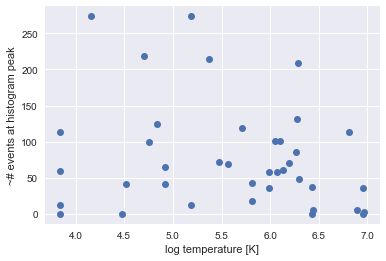

In [206]:
plt.plot(temperatures, num_peak_max_depths, 'o')
plt.xlabel('log temperature [K]')
plt.ylabel('~# events at histogram peak');

So still trend 1 is definitely not there. If anything it's worse. Well... what's another way of looking at it. I could use those vertical grid marks to conveniently count up the number of points, or better yet the sum of values, in each gridded bin.

grid:#points:sum
1:4:186
2:2:271
3:6:594
4:4:558
5:6:345
6:12:903
7:5:175

So maybe that shows a very slight hump in the middle for the sum of points, though that bin 6 is really throwing it off (logT from 6-6.5). 

Trend 2 will be identical since normalizing the peak in the histogram will have no impact on it's x-location, so I won't show that plot. Instead I'll try making a plot of the sum numbers above vs logT. 

In [238]:
data = [
    go.Histogram(
        histfunc='sum',
        x=temperatures,
        y=num_peak_max_depths)]

layout = go.Layout(
    xaxis=dict(
        title='log Temperature [K]'
    ),
    yaxis=dict(
        title='Sum of # events at histogram peak'
    ),
    bargap=0,
    bargroupgap=0
)
figure = go.Figure(data=data, layout=layout)
py.iplot(figure, filename='JEDI peak histogram vs temperature')
#pio.write_image(figure, 'peak_histogram_vs_temperature.pdf', scale=2)

# 2D density/histogram plot

Here I want to make a plot of depth max vs temperature for all events and put contours over it to indicate the density of points, then histograms on the sides to show how that density looks in each dimension. Those types of plots are pretty common. Example here: https://plot.ly/python/2d-density-plots/. 

So my x will be temperature and y will be depth but I need to reform my data in order to produce this. 

In [310]:
df = jedi[get_line_depth_col_names(wavelength_sorted=True)]

In [311]:
df.head()

,9.4 Depth Max [%],13.1 Depth Max [%],13.3 Depth Max [%],17.1 Depth Max [%],17.7 Depth Max [%],18.0 Depth Max [%],19.5 Depth Max [%],20.2 Depth Max [%],21.1 Depth Max [%],25.6 Depth Max [%],28.4 Depth Max [%],30.4 Depth Max [%],33.5 Depth Max [%],36.1 Depth Max [%],36.8 Depth Max [%],44.6 Depth Max [%],46.5 Depth Max [%],49.9 Depth Max [%],52.1 Depth Max [%],52.6 Depth Max [%],53.7 Depth Max [%],55.4 Depth Max [%],56.8 Depth Max [%],58.4 Depth Max [%],59.2 Depth Max [%],60.0 Depth Max [%],61.0 Depth Max [%],62.5 Depth Max [%],63.0 Depth Max [%],71.9 Depth Max [%],72.2 Depth Max [%],77.0 Depth Max [%],79.0 Depth Max [%],83.6 Depth Max [%],95.0 Depth Max [%],97.3 Depth Max [%],97.7 Depth Max [%],102.6 Depth Max [%],103.2 Depth Max [%]
GOES Flare Peak Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-05-04 16:29:00,6.603426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.649157,1.256415,NaN,0.751282,NaN,NaN,NaN,NaN,NaN,3.497258,NaN,NaN,0.947984,0.883143,NaN,NaN,NaN,NaN,4.222235,NaN,1.020263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-05 07:16:00,0.524980,1.690090,NaN,NaN,NaN,NaN,NaN,NaN,1.720140,NaN,NaN,0.521326,NaN,NaN,NaN,NaN,NaN,2.000943,NaN,NaN,NaN,0.459486,NaN,NaN,NaN,NaN,0.890314,NaN,1.535517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-05 11:52:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.417322,0.256221,NaN,NaN,NaN,NaN,NaN,0.511769,1.098369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-05 17:19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.956662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.605432,1.818041,NaN,NaN,NaN,NaN,2.326647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-07 07:42:00,NaN,2.098988,NaN,NaN,1.622852,NaN,NaN,NaN,NaN,NaN,NaN,0.743517,NaN,NaN,NaN,NaN,NaN,1.198888,1.782667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.158293,1.701928,1.679752,NaN,NaN,NaN,NaN,1.59483,NaN,NaN,NaN,NaN,2.306918


In [ ]:
x = 
y = (t**6)+(0.3*np.random.randn(2000))

In [ ]:
trace1 = go.Scatter(
    x=x, y=y, mode='markers', name='points',
    marker=dict(color='rgb(102,0,0)', size=2, opacity=0.4)
)
trace2 = go.Histogram2dcontour(
    x=x, y=y, name='density', ncontours=20,
    colorscale='Hot', reversescale=True, showscale=False
)
trace3 = go.Histogram(
    x=x, name='x density',
    marker=dict(color='rgb(102,0,0)'),
    yaxis='y2'
)
trace4 = go.Histogram(
    y=y, name='y density', marker=dict(color='rgb(102,0,0)'),
    xaxis='x2'
)
data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    showlegend=False,
    autosize=False,
    width=600,
    height=550,
    xaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    yaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    margin=dict(
        t=50
    ),
    hovermode='closest',
    bargap=0,
    xaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    ),
    yaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    )
)

fig = go.Figure(data=data, layout=layout)
plot_url = py.plot(fig, filename='JEDI 2D Histogram Density')

# Statistical Moments

In [101]:
temperature_sorted_lines = ['53.7', '95.0', '97.3', '102.6', '58.4', '71.9', '83.6', '30.4', '25.6', '97.7', '52.6', '60.0', '55.4', '79.0',
                            '63.0', '103.2', '13.1', '46.5', '17.1', '77.0', '17.7', '36.8', '62.5', '18.0', '61.0', '19.5', '20.2', '21.1',
                            '52.1', '49.9', '28.4', '33.5', '36.1', '44.6', '9.4', '59.2', '56.8', '72.2', '13.3']
temperature_sorted_line_depths = [s + ' Depth Max [%]' for s in temperature_sorted_lines]

df_depths = jedi.filter(like='Depth Max [%]').dropna(how='all')
df_depths_uncorrected = jedi[temperature_sorted_line_depths]

plot_titles = [s + ' (' for s in log_temperatures]
plot_titles = [m + str(n) for m,n in zip(plot_titles, temperature_sorted_lines)]
plot_titles = [s + ' nm)' for s in plot_titles]

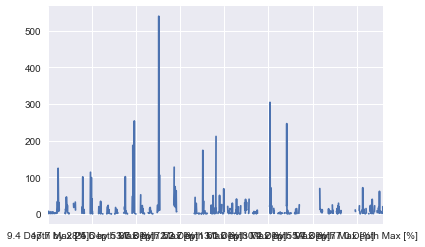

In [113]:
df_depths.std().plot()

In [120]:
trace1 = go.Scatter(
    x=plot_titles,
    y=df_depths_uncorrected.mean(),
    mode='lines',
    name='$\mu$',
    line=dict(
        shape='hv'
    )
)
trace2 = go.Scatter(
    x=plot_titles,
    y=df_depths_uncorrected.std(),
    mode='lines',
    name='$\sigma$',
    line=dict(
        shape='hv'
    )
)
data = [trace1, trace2]

layout = go.Layout(
    legend=dict(
        y=0.5,
        font=dict(
            size=16
        )
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='logT and wavelength',
            font=dict(
                size=16
            )
        ), 
        automargin=True
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='Depth Max [%]',
            font=dict(
                size=16
            )
        )
    )
)
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Depth Mean and Std')

Mean values are all pretty small, less than about 4%. That's good.. about what I expected. Of course there can be a lot of variety around that, as shown by the standard deviation. 

Standard deviation is usually pretty comparable to the mean, which means there's a decent amount of variability (which is clear when looking at the histograms too). 

In [121]:
trace3 = go.Scatter(
    x=plot_titles,
    y=df_depths_uncorrected.skew(),
    mode='lines',
    name='skew',
    line=dict(
        shape='hv'
    )
)
trace4 = go.Scatter(
    x=plot_titles,
    y=df_depths_uncorrected.kurt(),
    mode='lines',
    name='kurtosis',
    line=dict(
        shape='hv'
    )
)
data = [trace3, trace4]

layout = go.Layout(
    legend=dict(
        y=0.5,
        font=dict(
            size=16
        )
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='logT and wavelength',
            font=dict(
                size=16
            )
        ), 
        automargin=True
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='Value [unitless]',
            font=dict(
                size=16
            )
        )
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Depth Skew and Kurtosis')

The skewness is always positive, indicating that the distributions are always heavy on the left and tail off to the right. The values are usually >1.6, as expected. Largest value of 13 is for 25.6 nm, indicating that it is super super heavy on the left. 

In the kurtosis, I see that the 25.6 nm line has a HUGE (200+) positive kurtosis, which basically means it's like a delta function. 

So in both, it looks like 25.6 is anomalous. Looking back at the histogram, 

## How many things are dimming events? 

Try defining a dimming event as having a detected depth in both 17.1 and 19.5 nm lines. 

In [63]:
df2 = df[['17.1 Depth Max [%]', '19.5 Depth Max [%]']].dropna(how='any')

In [64]:
df2.head()

,17.1 Depth Max [%],19.5 Depth Max [%]
GOES Flare Peak Time,,
2010-06-13 10:53:00,2.233621,2.084706
2010-07-20 13:45:00,7.107572,5.415132
2010-08-14 18:08:00,2.009370,2.652916
2010-10-18 21:39:00,0.909666,1.520220
2010-11-04 02:53:00,2.716574,0.802429


In [65]:
df2.describe()

,17.1 Depth Max [%],19.5 Depth Max [%]
count,122.000000,122.000000
mean,2.116652,1.791099
std,1.352528,1.482843
min,0.135862,0.275905
25%,1.103791,0.794681
50%,1.794139,1.294826
75%,2.811365,2.217387
max,7.107572,7.870971


So out of the 5051 events, only 122 would classify as dimming detected with this criterion! Yikes, that's low. Only 2.4% of all potential events. That yield is disappointingly low. Though it is still 4x the number of events in our lasst paper. Still.. it's taken me much more than 4x the time to obtain these events automatically than it would've more manually and there's probably a lot of bad events in there.  

The mean values look reasonable though. And it's as expected: larger mean for 17.1 than 19.5. Larger standard deviations than I'd like. The minimum values are also lower than I'd like, at about the level of precision that we have with EVE. Max values also seem reasonable, and given that they are so close to each other, I'll bet that's from the same event. 

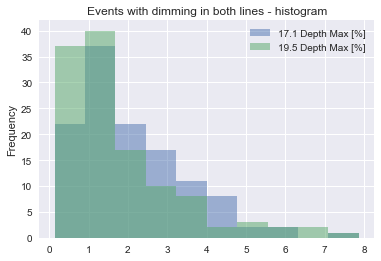

In [78]:
df2.plot(kind='hist', title='Events with dimming in both lines - histogram', alpha=0.5);

# Calculate how many big dimmings for Kevin ESCAPE -- how many expected dimmings in DEEP survey

In [4]:
df3 = jedi.filter(like='Depth Max [%]').dropna(how='all')

In [20]:
big_dim_df = df3[(df3 >= 5).any(axis=1)]
num_big_dim = float(len(big_dim_df))
num_any_dim = float(len(df3))
fraction_deep_dim = num_big_dim / num_any_dim

In [21]:
print('I have {0} events with a max dimming depth > 6%.\nI have {1} events where any level of dimming could be measured.\nThat is a rate of {2}%'.format(
    num_big_dim, num_any_dim, fraction_deep_dim * 100.))

I have 944.0 events with a max dimming depth > 6%.
I have 2387.0 events where any level of dimming could be measured.
That is a rate of 39.547549224968584%


In [22]:
days = 140
cmes_per_day = 3.6
fraction_fast_cmes = 0.06
fraction_slow_cmes_dim = 0.55
fraction_fast_cmes_dim = 1
observational_efficiency = 0.6  # Accounts for earth eclipses, SAA shutdowns, etc

fraction_deep_dim = num_big_dim / num_any_dim

num_slow_cmes = days * cmes_per_day * (1 - fraction_fast_cmes)
num_fast_cmes = days * cmes_per_day * fraction_fast_cmes

num_slow_cme_deep_dim = num_slow_cmes * fraction_slow_cmes_dim * fraction_deep_dim
num_fast_cme_deep_dim = num_fast_cmes * fraction_fast_cmes_dim * fraction_deep_dim

num_dim_observable = round((num_slow_cme_deep_dim + num_fast_cme_deep_dim) * observational_efficiency)
num_dim_observable

69